In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #sayısal verilere çevirme için
import matplotlib.pyplot as plt #görselleştirme için
import seaborn as sns #görselleştirme için
from sklearn.model_selection import train_test_split #veriyi egitim ve test veri
#modellerini ekleyin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [3]:
#1.Veri Setini Yükle
df=pd.read_csv("turkey_car_market.csv")
#Veri setinin ilk 5 satırına bak
df.head(5)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [4]:
df[df['Fiyat']>5000000]

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
3478,12/05/2020,Hyundai,I20,1.4 CRDI Jump,2013.0,Dizel,Düz Vites,1300 cc ve altı,76-100 BG,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,140000,5086500


In [5]:
df=df.drop([3478], axis=0)

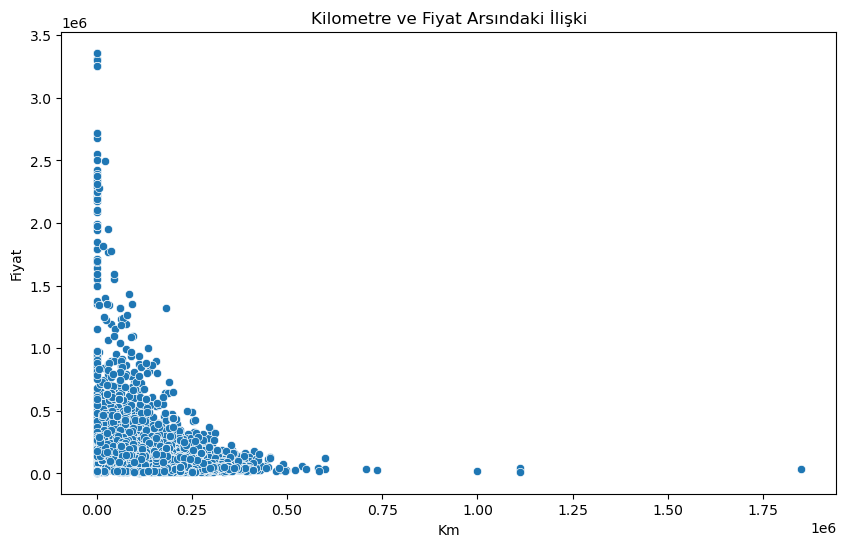

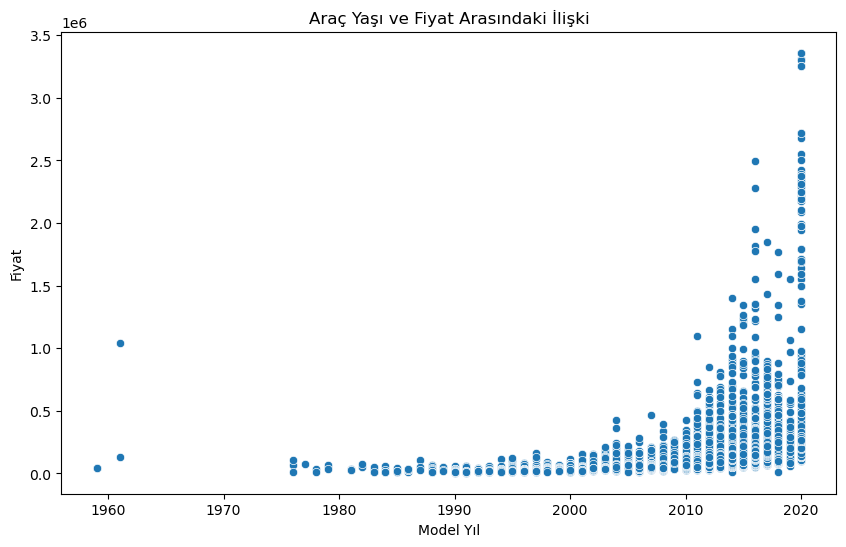

In [6]:
#3,Veri Görselleştirme
#matplotlib.pyplot ve seaborn import edilir
#Fiyat ve kilometre ilişkisini görselleştirme
plt.figure(figsize=(10,6))
sns.scatterplot(x='Km',y='Fiyat',data=df)
plt.title("Kilometre ve Fiyat Arsındaki İlişki")
plt.show()
#Fiyat ve araç yaşını görselleştirme
plt.figure(figsize=(10,6))
sns.scatterplot(x='Model Yıl', y='Fiyat',data=df)
plt.title("Araç Yaşı ve Fiyat Arasındaki İlişki")
plt.show()

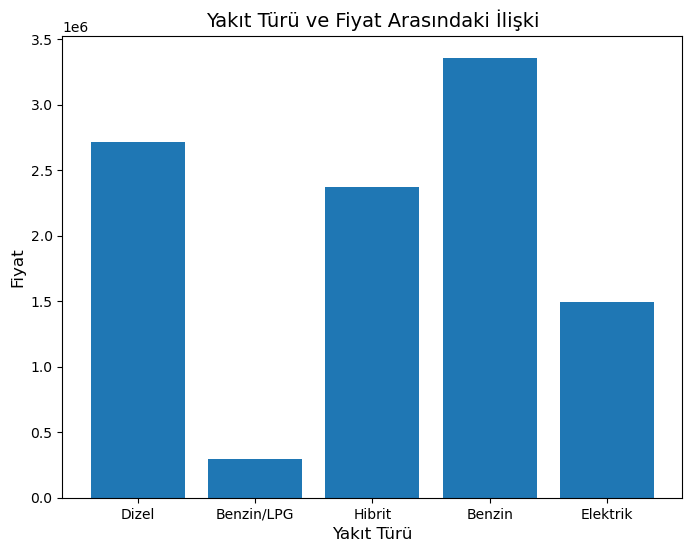

In [7]:
#Yakıt türüne göre fiyat dagılımını gösteren çubuk grafiği
plt.figure(figsize=(8,6))
plt.bar(df['Yakıt Turu'], df['Fiyat'], data=df)

#Başlık ve etiketler ekleme
plt.title('Yakıt Türü ve Fiyat Arasındaki İlişki',fontsize=14)
plt.xlabel('Yakıt Türü', fontsize=12)
plt.ylabel('Fiyat', fontsize=12)

#Grafiği gösterme
plt.show()

In [8]:
#'İlan Tarihi','Arac Tip Grubu','Arac Tip' gibi sütunlarını kaldırma
df = df.drop(['İlan Tarihi', 'Arac Tip Grubu', 'Arac Tip', 'CCM', 'Beygir Gucu', 'Kasa Tipi', 'Kimden', 'Durum'], axis=1)
df

,Marka,Model Yıl,Yakıt Turu,Vites,Renk,Km,Fiyat
0,Jaguar,2017.0,Dizel,Otomatik Vites,Lacivert,26100,634500
1,Acura,2015.0,Dizel,Yarı Otomatik Vites,Mavi,127000,151500
2,Acura,1994.0,Benzin/LPG,Düz Vites,Turkuaz,175000,19750
3,Acura,2013.0,Dizel,Düz Vites,Kahverengi,325,52000
4,Acura,2010.0,Dizel,Otomatik Vites,Beyaz,207000,148750
...,...,...,...,...,...,...,...
9039,Tofaş,1994.0,Benzin/LPG,Düz Vites,Beyaz,121212,12250
9040,Tofaş,1992.0,Benzin/LPG,Düz Vites,Bej,54000,16300
9041,Tofaş,1993.0,Benzin/LPG,Düz Vites,Yeşil,135000,19000
9042,Tofaş,1991.0,Benzin/LPG,Düz Vites,Kırmızı,250000,11000


In [9]:
#Kategorik verileri sayısal verilere dönüstürme(Label Endoding)
#sklearn.preprocessing kütüphanesinden LabelEncoder projeye dahil edilir
label_encoder=LabelEncoder()
df['Marka']=label_encoder.fit_transform(df['Marka'])
df['Yakıt Turu']=label_encoder.fit_transform(df['Yakıt Turu'])
df['Vites']=label_encoder.fit_transform(df['Vites'])
df['Renk']=label_encoder.fit_transform(df['Renk'])
df

,Marka,Model Yıl,Yakıt Turu,Vites,Renk,Km,Fiyat
0,16,2017.0,2,1,17,26100,634500
1,0,2015.0,2,2,18,127000,151500
2,0,1994.0,1,0,23,175000,19750
3,0,2013.0,2,0,13,325,52000
4,0,2010.0,2,1,4,207000,148750
...,...,...,...,...,...,...,...
9039,34,1994.0,1,0,4,121212,12250
9040,34,1992.0,1,0,3,54000,16300
9041,34,1993.0,1,0,25,135000,19000
9042,34,1991.0,1,0,16,250000,11000


In [10]:
#Özellikleri nyani bagımsız değişkenleri(X) ve
#hedef değişkeni yani bagımlı değişkeni (y) ayıralım
X=df.drop('Fiyat',axis=1)#'fiyat' sütununu hedef olarak almak
y=df['Fiyat']

In [11]:
X #bagımsız değişkenler

,Marka,Model Yıl,Yakıt Turu,Vites,Renk,Km
0,16,2017.0,2,1,17,26100
1,0,2015.0,2,2,18,127000
2,0,1994.0,1,0,23,175000
3,0,2013.0,2,0,13,325
4,0,2010.0,2,1,4,207000
...,...,...,...,...,...,...
9039,34,1994.0,1,0,4,121212
9040,34,1992.0,1,0,3,54000
9041,34,1993.0,1,0,25,135000
9042,34,1991.0,1,0,16,250000


In [12]:
y #bagımlı değişken yani fiyat

0       634500
1       151500
2        19750
3        52000
4       148750
         ...  
9039     12250
9040     16300
9041     19000
9042     11000
9043     15750
Name: Fiyat, Length: 9043, dtype: int64

In [13]:
# Veriyi egitim ve test setlerine ayırma
X_train , X_test, y_train ,y_test= train_test_split(X , y , test_size=0.2 , random_state=42)

In [14]:
#Modelleri tanımlamak
models= {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

In [17]:
# Her model için eğitme ve değerlendirme yapalım
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_train, y_train)

    # Test verisi üzerinde tahmin yap
    y_pred = model.predict(X_test)

    # Performans metriklerini hesaplayalım
    print(f"\n{model_name} Modeli:")
    print("R Skoru:", r2_score(y_test, y_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Linear Regression Modeli:
R Skoru: 0.21642648145245036
Mean Absolute Error (MAE): 82052.24236512018
Mean Squared Error (MSE): 26578795484.124523

Decision Tree Modeli:
R Skoru: 0.6932047286171241
Mean Absolute Error (MAE): 34163.21800701652
Mean Squared Error (MSE): 10406488453.944752

Random Forest Modeli:
R Skoru: 0.783620814579649
Mean Absolute Error (MAE): 28984.565617132288
Mean Squared Error (MSE): 7339576925.684444
